<a href="https://colab.research.google.com/github/bhanukad610/Fare-Classification/blob/master/Fare_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To do


1.   Include other imputation methods than median
2.   Explore data
3.   Analyse data



In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### Functions

In [0]:
import numpy as np
from sklearn.impute import SimpleImputer

def naImputation(Features, column_names):
  # df.replace(np.NaN,np.NaN,inplace=True)
  imp=SimpleImputer(missing_values=np.NaN)
  idf=pd.DataFrame(imp.fit_transform(Features))
  idf.columns=Features.columns
  idf.index=Features.index

  for column_name in column_names:
    idf[column_name].isna().sum()

  
  return idf

In [0]:
from math import radians, sin, cos, acos

#function to calculte distance from lat and longs
def calculateDistance(pick_lat,pick_lon, drop_lat, drop_lon):
      pick_lat = radians(float(pick_lat))
      pick_lon = radians(float(pick_lon))
      drop_lat = radians(float(drop_lat))
      drop_lon = radians(float(drop_lon))

      if (pick_lon == drop_lon):
        distance = 0.0
        return round(distance, 2)
      else:
        distance = 6371.01 * acos(sin(pick_lat)*sin(drop_lat) + cos(pick_lat)*cos(drop_lat)*cos(pick_lon - drop_lon))

      # distance = 6371.01 * acos(sin(pick_lat)*sin(drop_lat) + cos(pick_lat)*cos(drop_lat)*cos(pick_lon - drop_lon))
      return round(distance, 2)

def calculateDistanceDf(pick_lat_frame,pick_lon_frame, drop_lat_frame, drop_lon_frame, distancedf):
  for i in range(len(drop_lon_frame)):
    pick_lat = pick_lat_frame[i]
    pick_lon = pick_lon_frame[i]
    drop_lat = drop_lat_frame[i]
    drop_lon = drop_lon_frame[i]

    try:
      distance = calculateDistance(pick_lat,pick_lon, drop_lat, drop_lon)
    except:
      print("Error occured! , at", i)

    distancedf[i] = distance

In [0]:
def preprocess(df, features):
  Features_to_calculate_distance = df[features_to_calculate_distance]
  Features_to_calculate_distance = naImputation(Features_to_calculate_distance, features_to_calculate_distance)
  
  distancedf = df['distance']
  distancedf = calculateDistanceDf(df['pick_lat'], df['pick_lon'], df['drop_lat'], df['drop_lon'], distancedf)

  
  features.append('distance')
  Features = df[features]
  Features = naImputation(Features,features)
  return Features

In [0]:
def getX(Features):
    X= preprocessing.StandardScaler().fit(Features).transform(Features)
    return X

### Load data

In [0]:
df = pd.read_csv('/content/drive/My Drive/Semester 7/ML/Project/Data/train.csv')
df['label'].replace(to_replace=['correct','incorrect'], value=[1,0],inplace=True)
df['distance'] = df['drop_lat']
features = ['additional_fare','duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup', 'fare']
features_to_calculate_distance = ['pick_lat','pick_lon', 'drop_lat', 'drop_lon']

In [0]:
Features = preprocess(df, features)
X = getX(Features)
y = df['label'].values
Features.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup', 'fare', 'distance']


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,distance
0,10.500000,834.000000,56.000000,0.000000,64.000000,270.32,5.09
1,10.500000,791.000000,47.000000,0.000000,134.000000,197.85,3.17
2,10.500000,1087.000000,80.000000,0.000000,61.000000,301.64,6.31
3,10.500000,598.000000,271.000000,15.663800,68.000000,82.30,0.86
4,13.719651,1702.858077,629.074231,32.057666,112.466832,358.39,8.15


In [0]:
df_test = pd.read_csv('/content/drive/My Drive/Semester 7/ML/Project/Data/test.csv')
features_test = ['additional_fare','duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup', 'fare']
Features_for_test = df_test[features_test]
df_test['distance'] = df_test['drop_lat']

In [0]:
Features_for_test = preprocess(df_test, features_test)
X_pred = getX(Features_for_test)
Features_for_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup', 'fare', 'distance']


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,distance
0,10.5,924.0,42.0,2.4486,148.0,289.27,6.71
1,10.5,4249.0,20.0,0.0000,91.0,1912.70,41.56
2,10.5,1552.0,255.0,2.6588,23.0,394.00,5.92
3,10.5,462.0,16.0,0.0000,198.0,154.32,3.30
4,10.5,814.0,392.0,12.3692,69.0,147.47,2.59


### With all features

In [0]:
all_features = features + features_to_calculate_distance
Features = df[all_features]
Features = naImputation(Features,all_features)
X= preprocessing.StandardScaler().fit(Features).transform(Features)
df['label'].replace(to_replace=['correct','incorrect'], value=[1,0],inplace=True)
y = df['label'].values

In [0]:
Features.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,distance
0,10.500000,834.000000,56.000000,0.000000,64.000000,270.32,5.09
1,10.500000,791.000000,47.000000,0.000000,134.000000,197.85,3.17
2,10.500000,1087.000000,80.000000,0.000000,61.000000,301.64,6.31
3,10.500000,598.000000,271.000000,15.663800,68.000000,82.30,0.86
4,13.719651,1702.858077,629.074231,32.057666,112.466832,358.39,8.15


### Import Modules

In [0]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb

In [0]:
trainScores={}
testScores={}

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models

### K Nearest Neighbor(KNN)

In [0]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X_train, y_train=X,y

bestScore=0.0
accList=[]
for k in range(3,15):
    clf_knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    
    scores = cross_val_score(clf_knn, X, y, cv=10)
    score=scores.mean()
    accList.append(score)
    
    if score > bestScore:
        bestScore=score
        best_clf=clf_knn
        bestK=k
print("Best K is :",bestK,"| Cross validation Accuracy :",bestScore)
clf_knn=best_clf

Best K is : 6 | Cross validation Accuracy : 0.9433505796652393


In [0]:
clf_knn.fit(X,y)
y_pred=best_clf.predict(X)
trainScores={}

In [0]:
# trainScores['KNN-jaccard']=jaccard_similarity_score(y_test, y_pred)
trainScores['KNN-macro-f1-score']=f1_score(y, y_pred, average='macro')
trainScores

{'KNN-f1-score': 0.8499648039611403}

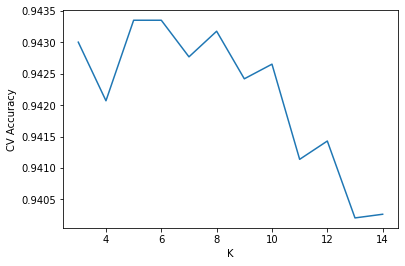

In [0]:
plt.plot(range(3,15),accList)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()

### Decision Tree

In [0]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X_train, y_train)

y_pred=clf_tree.predict(X_train)

In [0]:
trainScores['Tree-f1-score']=f1_score(y_train, y_pred, average='macro')

In [0]:
trainScores

{'KNN-f1-score': 0.8499648039611403, 'Tree-f1-score': 1.0}

In [0]:
!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus

dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                     feature_names=['additional_fare',
                                    'duration','meter_waiting',
                                    'meter_waiting_fare',
                                    'meter_waiting_till_pickup',
                                    'fare'
                                   ],  
                     class_names='label',  
                     filled=True, rounded=True,  
                     special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"6,6!"')
gvz_graph = graphviz.Source(graph.to_string())

gvz_graph

### Support Vector Machine

In [0]:
from sklearn import svm

clf_svm = svm.LinearSVC(random_state=7)
clf_svm.fit(X, y)  

y_pred=clf_svm.predict(X)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
trainScores['SVM-macro-f1-score']=f1_score(y, y_pred, average='macro')
trainScores

{'KNN-f1-score': 0.8499648039611403,
 'LogReg-macro-f1-score': 0.5859680990455013,
 'SVM-macro-f1-score': 0.5564657902152466,
 'Tree-f1-score': 1.0}

### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='auto')
clf_log.fit(X_train, y_train)

y_pred=clf_log.predict(X_train)
y_proba=clf_log.predict_proba(X_train)
testy=y.astype(float)

In [0]:
trainScores['LogReg-macro-f1-score']=f1_score(y_train, y_pred, average='macro')  

### XGBoost

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 5, 'min_child_weight': 3, 'max_delta_step': 1, 'subsample': 0.8}

In [0]:
xgb_model = xgb.XGBClassifier(learning_rate = 0.26, objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print(f1_score(y_test, y_pred, average='weighted'))

0.9466488401849964


### SGD

In [0]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred = clf.predict(X)
print(f1_score(y, y_pred, average='weighted'))

0.8821084571860837


## Final scores 

In [0]:
trainScores

{'KNN-f1-score': 0.8499648039611403,
 'LogReg-macro-f1-score': 0.5818656865989672,
 'SVM-macro-f1-score': 0.5564657902152466,
 'Tree-f1-score': 1.0,
 'xgb-f1-score': 0.8249485589945587,
 'xgb-macro-f1-score': 0.8198997436536051}

# Prediction

In [0]:
y_pred_for_test = clf.predict(X_pred)

In [0]:
y_pred_for_test

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
import csv

with open('/content/drive/My Drive/Semester 7/ML/Project/submission_sgd.csv', mode='w') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    employee_writer.writerow(['tripid','prediction'])
    for i in range(len(y_pred_for_test)):
      employee_writer.writerow([df_test['tripid'][i],y_pred_for_test[i]])